## Red Wine Quality Prediction Problem

Red Wine Quality Prediction Problem Statement: The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model.

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

Submission Details

Share the link of the repository as your submission.
Downlaod Files: https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

### Importing Liberary

In [55]:
#Data Lib
import numpy as np
import pandas as pd

#Visualization lib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Preprocessing lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#tunning lib
from sklearn.model_selection import GridSearchCV
#metrics

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#save

import pickle

import warnings
warnings.filterwarnings("ignore")


### Data Loading

In [2]:
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

<AxesSubplot:xlabel='quality', ylabel='count'>

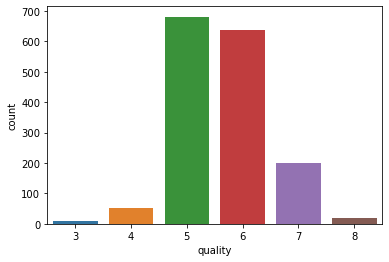

In [4]:
sns.countplot(data['quality'])

In [5]:
data.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


As per problem statement lets convert target value 'quality' in binary classification 0-6 as 0(not good) and 6+ as 1(good).

In [6]:
data['quality']=data['quality'].apply(lambda x: 1 if x > 6 else 0)

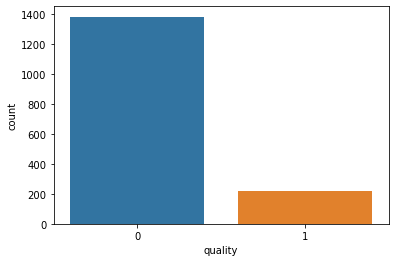

In [7]:
sns.countplot(data['quality'])
plt.show()              

In [8]:
data['quality'].value_counts()

print('0 category %:',round(217/(1382+217)*100))
print('1 category %:',round(1382/(1382+217)*100))

0 category %: 14
1 category %: 86


Its clearly reflecting data imbalancing, we have only 14% data in 0 category and 86% data on 1 category, we have to handle this issue otherwise model can be biased. i will perform sampling after cleaning dataset.

### Duplicacy Test

In [9]:
data.duplicated(keep='last').sum()

240

Its shwing 240 duplicates in dataset so we have to remove duplicacy.

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated(keep='last').sum()

0

In [12]:
data.shape

(1359, 12)

All duplicacy removed from dataset now.

We have now 1359 observations & 12 features including target variable.

### Categorical & Null Testing

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [14]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As we can see there is no null value in dataset all features are numeric.

### Describe Data

In [15]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,0.135394
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.342270
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


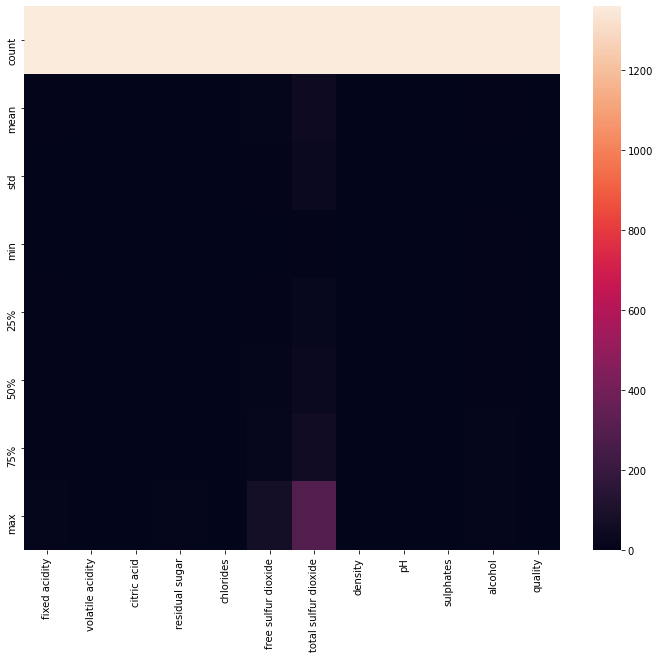

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(data.describe())
plt.show()

As again we can see all features are having equal observations i.e. 1359.
in residual sugar, free sulfur dioxide, total sulfur dioxide max value is seems higher. it can be an outlier we check it later on.

### Correlation & multicollinearty Test

In [17]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.116120
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.267344
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.203561
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.052811
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.096806
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.072771
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.135877
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.158052
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.054131
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.201551


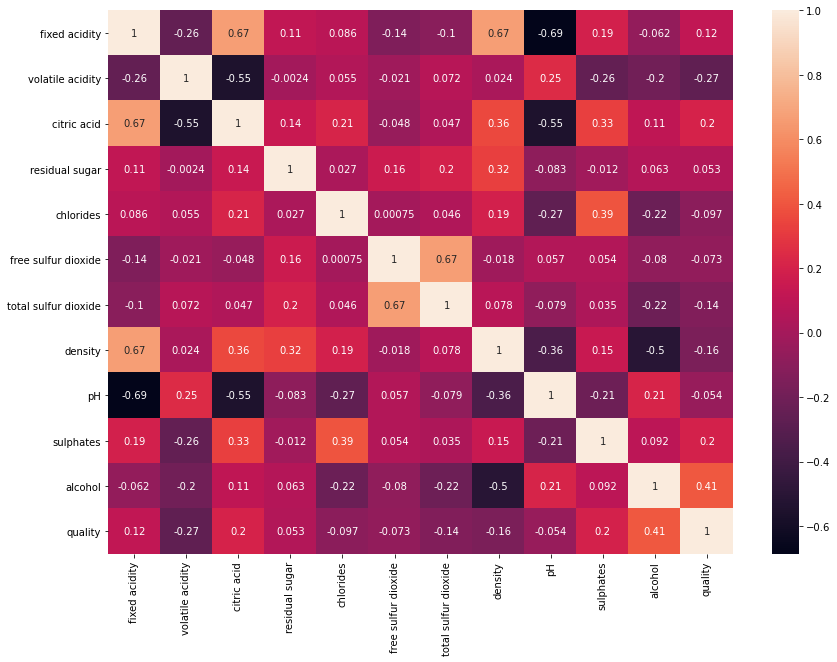

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

no multicollinearity found amongs all features.
target quality have postive & negative correlation with all features.
will apply feature selection to pick best features. 

### Select best Features using K-best

In [19]:
from sklearn.feature_selection import SelectKBest,f_classif

In [20]:
X=data.drop('quality',axis=1)
y=data.quality

In [21]:
best_features=SelectKBest(score_func=f_classif,k=8)

fit=best_features.fit(X,y)

scores=pd.DataFrame(fit.scores_)
scores['feature_name']=X.columns
scores.columns=['score','column_name']
scores.sort_values(by=['score'],ascending=False)

,score,column_name
10,274.086403,alcohol
1,104.454520,volatile acidity
2,58.660865,citric acid
9,57.459267,sulphates
7,34.767118,density
6,25.525127,total sulfur dioxide
0,18.547729,fixed acidity
4,12.837335,chlorides
5,7.224343,free sulfur dioxide
8,3.987902,pH


In [22]:
scores.nlargest(7,'score').column_name

10                 alcohol
1         volatile acidity
2              citric acid
9                sulphates
7                  density
6     total sulfur dioxide
0            fixed acidity
Name: column_name, dtype: object

In [23]:
New_X=data[scores.nlargest(7,'score').column_name]

In [24]:
New_X.reset_index()

,index,alcohol,volatile acidity,citric acid,sulphates,density,total sulfur dioxide,fixed acidity
0,0,9.4,0.700,0.00,0.56,0.99780,34.0,7.4
1,1,9.8,0.880,0.00,0.68,0.99680,67.0,7.8
2,2,9.8,0.760,0.04,0.65,0.99700,54.0,7.8
3,3,9.8,0.280,0.56,0.58,0.99800,60.0,11.2
4,5,9.4,0.660,0.00,0.56,0.99780,40.0,7.4
...,...,...,...,...,...,...,...,...
1354,1593,9.5,0.620,0.08,0.82,0.99651,38.0,6.8
1355,1594,10.5,0.600,0.08,0.58,0.99490,44.0,6.2
1356,1595,11.2,0.550,0.10,0.76,0.99512,51.0,5.9
1357,1597,10.2,0.645,0.12,0.71,0.99547,44.0,5.9


We have applied K best features selection technique & removed 4 features which contributing least.

### Distribution Plot

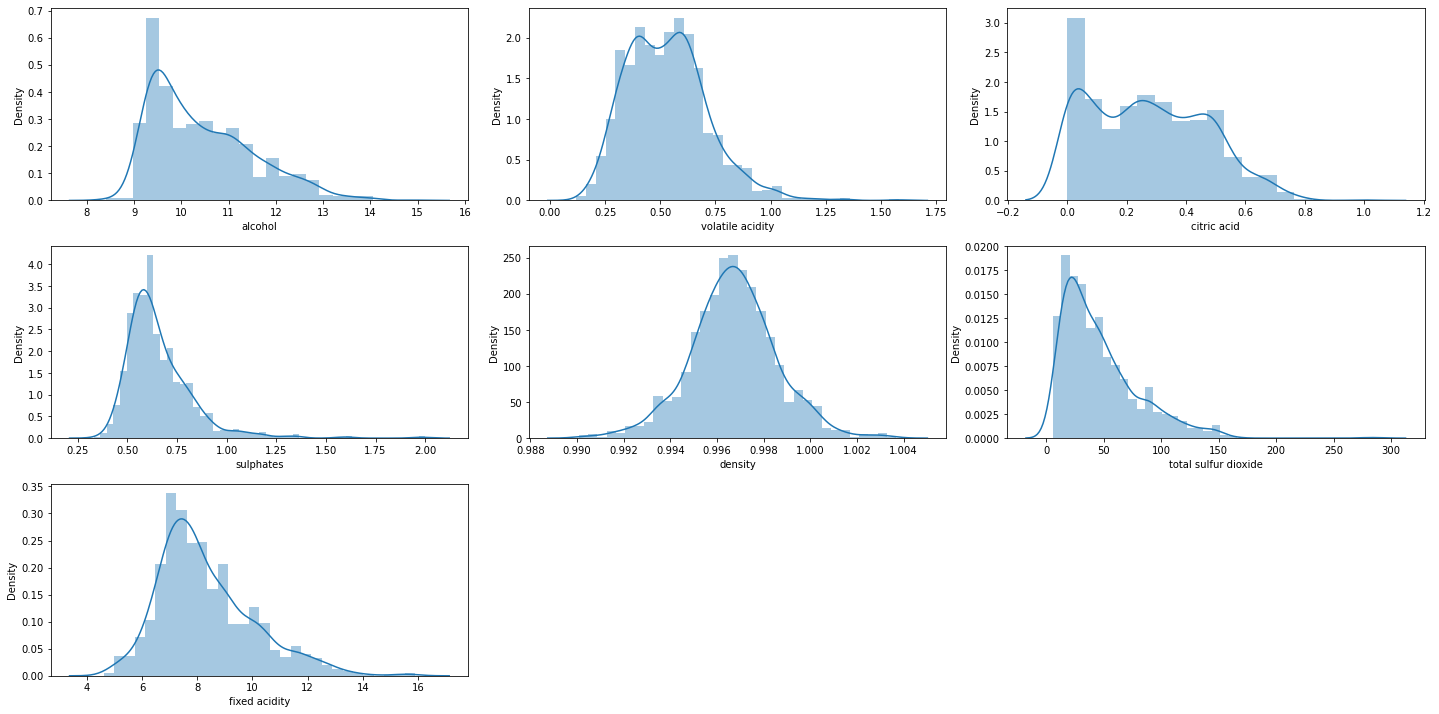

In [25]:
plt.figure(figsize=(20,10))

plotnumber=1

for col in New_X :
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(New_X[col])
        
    plotnumber+=1
    
plt.tight_layout()

As we observerd during data describe outliers with features same observation reflecting in distplot.

In [26]:
New_X.skew()

alcohol                 0.859841
volatile acidity        0.729279
citric acid             0.312726
sulphates               2.406505
density                 0.044778
total sulfur dioxide    1.540368
fixed acidity           0.941041
dtype: float64

its clearly reflecting skewness with several features, so we need to remove outliers

### Removing skewness/outliers

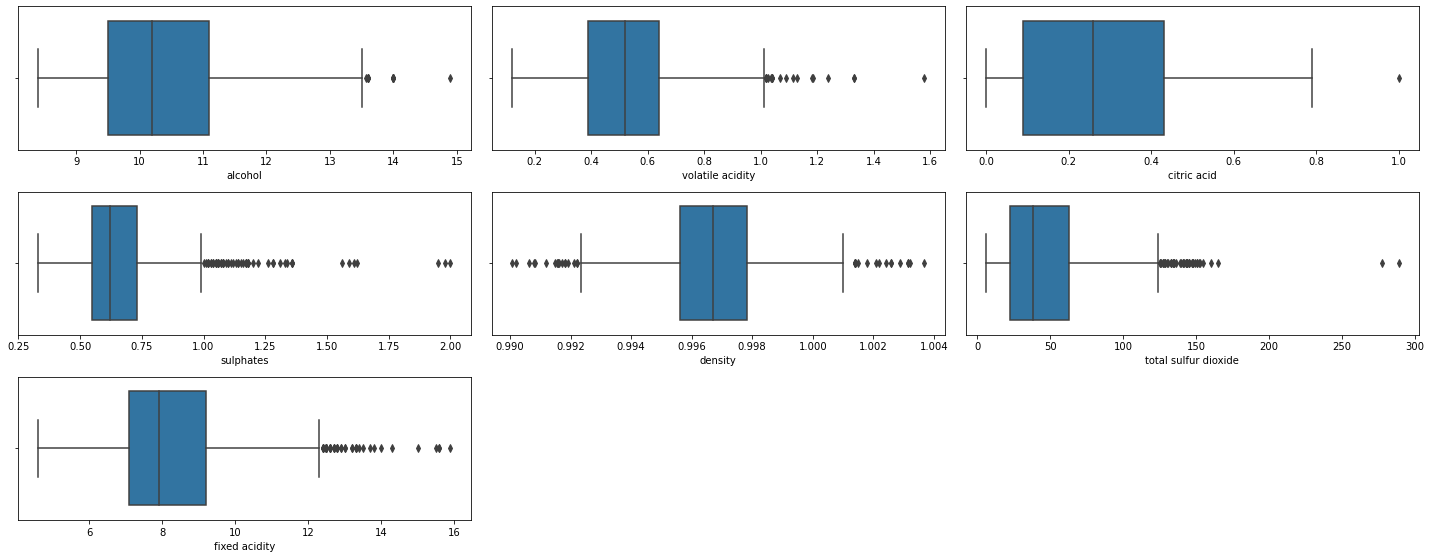

In [27]:
plt.figure(figsize=(20,10))

plotnumber=1

for col in New_X:
    if plotnumber<=13:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(New_X[col])
        
    plotnumber+=1
    
plt.tight_layout()

In [28]:
data=pd.concat([New_X,y],axis=1)
from scipy.stats import zscore
z=zscore(data)

In [29]:
data_new=data[(z<=3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(1359, 8)
(1298, 8)


In [30]:
print('we remove outliers & loose data in % is: ',np.round((1359-1298)/1359*100))

we remove outliers & loose data in % is:  4.0


In [31]:
data_new.skew()

alcohol                 0.771633
volatile acidity        0.408993
citric acid             0.282739
sulphates               1.061416
density                -0.081590
total sulfur dioxide    1.110441
fixed acidity           0.772732
quality                 2.131281
dtype: float64

### Sampling for data Imbalancing

In [58]:
from sklearn.utils import resample

In [69]:
#Split data with least target variable i.e. 1 for upsampling 
resam_data1=data_new[data_new.quality==1]
resam_data0=data_new[data_new.quality==0]
print(resam_data1['quality'].count())
print(resam_data0['quality'].count())

176
1122


In [70]:
#Since we have 1122 observation with 0, so will upsample 1 to same. 
upsample=resample(resam_data,replace=True,n_samples=1122,random_state=22)

In [73]:
upsample.shape

(1122, 8)

In [75]:
#combining again both dataset
data_new=pd.concat([resam_data0,upsample],axis=0)

In [76]:
data_new.shape

(2244, 8)

Resampling done & now we have 2244 observation & inbalancing

### Split Dataset

In [77]:
#dataset split

X=data_new.drop(columns=['quality'])
y=data_new.quality

### Scaling

In [78]:
scale=StandardScaler()
x_scale=scale.fit_transform(X)

### Train Test Split

In [79]:
# testing best random state
for i in range(10,100,3):
    x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)

    y_pred=lr.predict(x_test)

    print(accuracy_score(y_test,y_pred)*100,i)

80.3921568627451 10
80.3921568627451 13
81.10516934046346 16
80.92691622103388 19
80.21390374331551 22
78.43137254901961 25
85.02673796791443 28
79.85739750445633 31
80.57040998217468 34
79.50089126559715 37
80.03565062388593 40
81.81818181818183 43
79.32263814616756 46
78.78787878787878 49
80.74866310160428 52
81.10516934046346 55
81.99643493761141 58
80.74866310160428 61
81.10516934046346 64
81.46167557932263 67
81.28342245989305 70
79.14438502673798 73
80.74866310160428 76
80.74866310160428 79
79.67914438502673 82
81.10516934046346 85
79.50089126559715 88
82.53119429590018 91
81.28342245989305 94
79.32263814616756 97


16 is best random state

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.20,random_state=91)

### Model building- will try 4 algorithms

In [81]:
lr=LogisticRegression()
rfr=RandomForestClassifier()
knn=KNeighborsClassifier()
svm=SVC()

In [82]:
lr.fit(x_train,y_train)
rfr.fit(x_train,y_train)
knn.fit(x_train,y_train)
svm.fit(x_train,y_train)

SVC()

In [83]:
#lr score

y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

82.85077951002228


In [84]:
#rfr score

y_pred=rfr.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

97.55011135857461


In [85]:
#knn score

y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

85.96881959910914


In [86]:
#svm score

y_pred=svm.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

86.41425389755011


### Cross_validatation

In [44]:
from sklearn.model_selection import cross_val_score

In [87]:
print('Logistic Regression score:',np.mean(cross_val_score(lr,x_scale,y))*100)

print('Random Forest score:',np.mean(cross_val_score(rfr,x_scale,y))*100)

print('KNN score:',np.mean(cross_val_score(knn,x_scale,y))*100)

print('SVM score:',np.mean(cross_val_score(svm,x_scale,y))*100)

Logistic Regression score: 79.23242125357939
Random Forest score: 94.78583359847279
KNN score: 84.179327076042
SVM score: 82.21921730830417


In [88]:
y_pred=rfr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       196
           1       0.96      1.00      0.98       253

    accuracy                           0.98       449
   macro avg       0.98      0.97      0.97       449
weighted avg       0.98      0.98      0.98       449



### Random forest CV score is highest 94.78% & model score 97.55% so will continue with it.

### HyperparameterTunning

In [90]:
params={'n_estimators':[5,10,15,25,40,70,100],
        'criterion':['gini','entropy'],
        'min_samples_split':[1,2,4,6,8,12],
        'min_samples_leaf':[2,5,7,10],
        'max_depth':[5,10,20]        
        
    
}

grd=GridSearchCV(rfr,param_grid=params)
grd.fit(x_train,y_train)
grd.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 70}

In [120]:
rfr=RandomForestClassifier(criterion= 'gini',
 max_depth= 22,
 min_samples_leaf= 1,
 min_samples_split= 3,
 n_estimators= 99)

rfr.fit(wer)
y_pred=rfr.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

97.55011135857461


Have tried tunning but best score is getting same as with default params i.e. 97.55%

### Final Scoring

In [121]:
confusion_matrix(y_test,y_pred)

array([[185,  11],
       [  0, 253]], dtype=int64)

In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       196
           1       0.96      1.00      0.98       253

    accuracy                           0.98       449
   macro avg       0.98      0.97      0.97       449
weighted avg       0.98      0.98      0.98       449



### Model performing very well with around 98% accuracy

### AUC_ROC

In [123]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

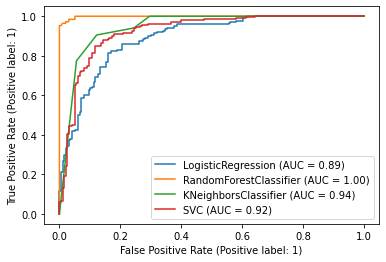

In [126]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,x_test,y_test,ax=disp.ax_)

### AUC_ROC score for random forest classifier is 100%

### Model Save

In [129]:
filename='red_wine.pickle'
pickle.dump(rfr,open(filename,'wb'))